In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r"C:\Users\Deepak\Downloads\mxmh_survey_results.csv")

In [16]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [18]:
# Data Cleaning and Preprocessing
# Handle missing values
data.fillna(method='ffill', inplace=True)  # Replace missing values with previous value

C:\Users\Deepak\AppData\Local\Temp\ipykernel_16420\2400163887.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Replace missing values with previous value


In [19]:
# Handle outliers (e.g., using IQR)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Age'] < (Q1 - 1.5 * IQR)) | (data['Age'] > (Q3 + 1.5 * IQR)))]

In [25]:
# Feature Engineering
# Create a new feature: 'Listening Habit'
def categorize_listening_habit(row):
    if row['Hours per day'] > 5:
        return 'Heavy Listener'
    elif row['Hours per day'] > 3:
        return 'Moderate Listener'
    else:
        return 'Light Listener'

In [38]:
data.isnull().sum()

Age                               0
Primary streaming service       677
Hours per day                     0
While working                   677
Instrumentalist                 677
Composer                        677
Fav genre                       677
Exploratory                     677
Foreign languages               677
BPM                               0
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [30]:
# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

# Extract numeric components from the timestamp
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

# Drop the original Timestamp column
data.drop(columns=['Timestamp'], inplace=True)

# Verify the conversion
print(data.head())

    Age Primary streaming service  Hours per day While working  \
0  18.0                   Spotify            3.0           Yes   
2  18.0                   Spotify            4.0            No   
4  18.0                   Spotify            4.0           Yes   
5  18.0                   Spotify            5.0           Yes   
6  18.0             YouTube Music            3.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0             Yes      Yes             Latin         Yes               Yes   
2              No       No  Video game music          No               Yes   
4              No       No               R&B         Yes                No   
5             Yes      Yes              Jazz         Yes               Yes   
6             Yes       No  Video game music         Yes               Yes   

     BPM  ...  OCD Music effects    Permissions    Listening Habit   Log_Age  \
0  156.0  ...  0.0           NaN  I understand.     Li

In [31]:
frequency_cols = [ 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]' ] 
# Define the order of categories 
frequency_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Very frequently'] 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
# Apply ordinal encoding 
ordinal_encoder = OrdinalEncoder(categories=[frequency_order] * len(frequency_cols)) 
data[frequency_cols] = ordinal_encoder.fit_transform(data[frequency_cols])

In [34]:
# Convert remaining object columns to numeric 
object_cols = data.select_dtypes(include=['object']).columns 
for col in object_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, 0 to 735
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           677 non-null    float64
 1   Primary streaming service     0 non-null      float64
 2   Hours per day                 677 non-null    float64
 3   While working                 0 non-null      float64
 4   Instrumentalist               0 non-null      float64
 5   Composer                      0 non-null      float64
 6   Fav genre                     0 non-null      float64
 7   Exploratory                   0 non-null      float64
 8   Foreign languages             0 non-null      float64
 9   BPM                           677 non-null    float64
 10  Frequency [Classical]         677 non-null    float64
 11  Frequency [Country]           677 non-null    float64
 12  Frequency [EDM]               677 non-null    float64
 13  Frequency 

In [37]:
# Standardize numeric columns 
scaler = StandardScaler()
numeric_cols = ['Age', 'Hours per day', 'BPM'] + frequency_cols 
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [39]:
data.dropna(axis=1,inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, 0 to 735
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           677 non-null    float64
 1   Hours per day                 677 non-null    float64
 2   BPM                           677 non-null    float64
 3   Frequency [Classical]         677 non-null    float64
 4   Frequency [Country]           677 non-null    float64
 5   Frequency [EDM]               677 non-null    float64
 6   Frequency [Folk]              677 non-null    float64
 7   Frequency [Gospel]            677 non-null    float64
 8   Frequency [Hip hop]           677 non-null    float64
 9   Frequency [Jazz]              677 non-null    float64
 10  Frequency [K pop]             677 non-null    float64
 11  Frequency [Latin]             677 non-null    float64
 12  Frequency [Lofi]              677 non-null    float64
 13  Frequency 

In [41]:
freq_cols = [col for col in data.columns if col.startswith('Frequency')]
data['Total_Frequency']=data[freq_cols].sum(axis=1)

In [42]:
data.head()

,Age,Hours per day,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Depression,Insomnia,OCD,Log_Age,Year,Month,Day,Hour,Minute,Total_Frequency
0,-0.652387,-0.198102,-0.038461,-0.361711,-0.787316,-0.142766,-0.887366,-0.503646,0.309698,-0.974247,...,0.0,1.0,0.0,2.890372,2022,8,27,19,29,3.237922
2,-0.652387,0.141172,-0.038461,-1.154198,-0.787316,2.158480,-0.887366,-0.503646,-0.447218,-0.063245,...,7.0,10.0,2.0,2.890372,2022,8,27,21,28,-0.698848
4,-0.652387,0.141172,-0.038462,-1.154198,-0.787316,-0.142766,-0.887366,0.923000,1.823529,-0.974247,...,2.0,5.0,9.0,2.890372,2022,8,27,21,54,3.445324
5,-0.652387,0.480445,-0.038463,-0.361711,1.047497,-0.909847,-0.887366,-0.503646,0.309698,2.669760,...,8.0,7.0,7.0,2.890372,2022,8,27,21,56,10.708329
6,-0.652387,-0.198102,-0.038463,0.430776,-0.787316,-0.142766,0.727545,0.923000,-0.447218,0.847756,...,8.0,6.0,0.0,2.890372,2022,8,27,22,0,-3.174746


In [43]:
data.describe()

,Age,Hours per day,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Depression,Insomnia,OCD,Log_Age,Year,Month,Day,Hour,Minute,Total_Frequency
count,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,6.770000e+02,...,677.000000,677.000000,677.000000,677.000000,677.0,677.000000,677.000000,677.000000,677.000000,6.770000e+02
mean,1.311933e-16,-1.075785e-16,2.623865e-18,2.099092e-17,7.609210e-17,1.180739e-17,-3.148638e-17,3.148638e-17,-3.148638e-17,2.623865e-17,...,4.952733,3.764402,2.751846,3.064338,2022.0,8.429838,21.072378,13.460857,28.587888,2.099092e-16
std,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,1.000739e+00,...,3.003447,3.060937,2.879948,0.270082,0.0,0.615285,10.720180,6.736175,17.513394,6.396444e+00
min,-1.879237e+00,-1.215922e+00,-3.846477e-02,-1.154198e+00,-7.873164e-01,-9.098474e-01,-8.873658e-01,-5.036459e-01,-1.204133e+00,-9.742471e-01,...,0.000000,0.000000,0.000000,2.302585,2022.0,8.000000,1.000000,0.000000,0.000000,-1.363163e+01
25%,-6.523869e-01,-5.373751e-01,-3.846214e-02,-3.617112e-01,-7.873164e-01,-9.098474e-01,-8.873658e-01,-5.036459e-01,-4.472175e-01,-9.742471e-01,...,2.000000,1.000000,0.000000,2.890372,2022.0,8.000000,12.000000,9.000000,13.000000,-4.405860e+00
50%,-3.456744e-01,-1.981016e-01,-3.846165e-02,-3.617112e-01,1.300901e-01,-1.427656e-01,-7.991063e-02,-5.036459e-01,-4.472175e-01,-6.324532e-02,...,5.000000,3.000000,2.000000,2.995732,2022.0,8.000000,28.000000,14.000000,29.000000,-6.961338e-01
75%,4.211067e-01,4.804453e-01,-3.846102e-02,4.307757e-01,1.300901e-01,6.243162e-01,7.275445e-01,9.229995e-01,3.096981e-01,8.477565e-01,...,7.000000,6.000000,5.000000,3.218876,2022.0,9.000000,29.000000,19.000000,43.000000,4.127702e+00
max,3.181519e+00,6.926642e+00,2.600000e+01,2.015750e+00,2.882310e+00,2.158480e+00,2.342455e+00,5.202936e+00,1.823529e+00,2.669760e+00,...,10.000000,10.000000,10.000000,3.761200,2022.0,11.000000,31.000000,23.000000,59.000000,3.637077e+01


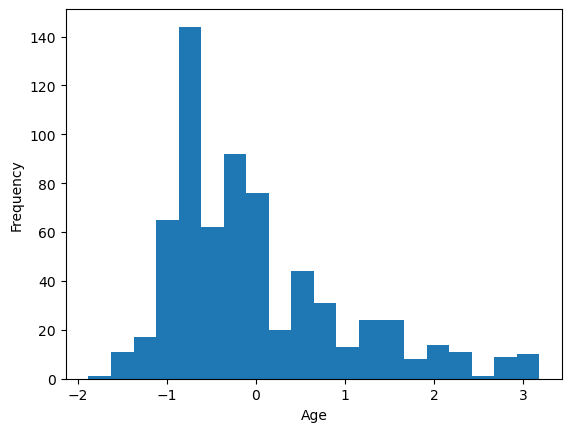

In [44]:
# Exploratory Data Analysis
# Univariate analysis
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

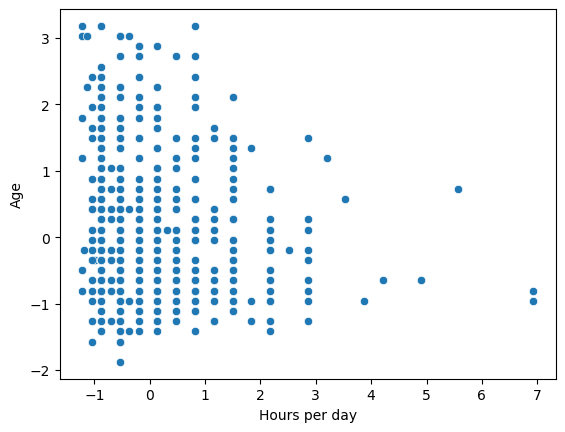

In [45]:

# Bivariate analysis
sns.scatterplot(x='Hours per day', y='Age', data=data)
plt.show()


In [46]:
# Correlation matrix
plt.figure(figsize=(100,100))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


C:\Users\Deepak\AppData\Local\Temp\ipykernel_16420\2602521689.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True)


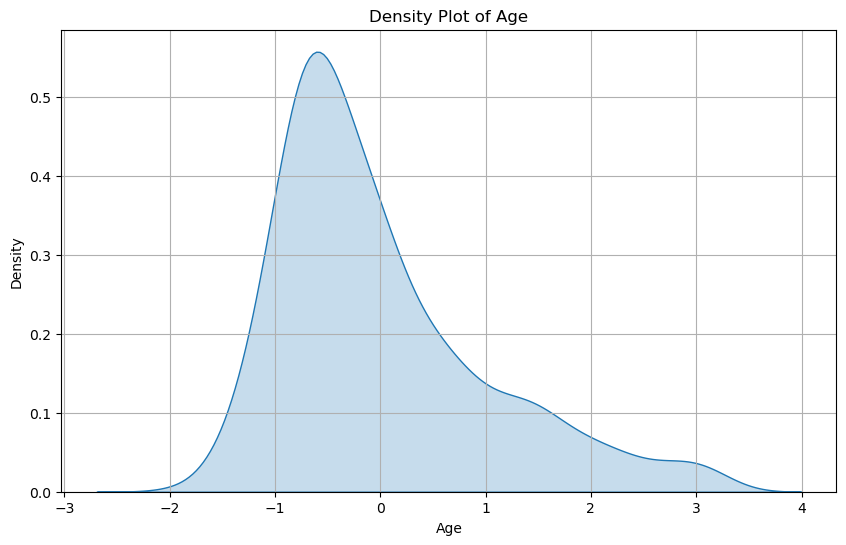

In [47]:
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data['Age'], shade=True) 
plt.title('Density Plot of Age') 
plt.xlabel('Age') 
plt.ylabel('Density') 
plt.grid(True) 
plt.show()

<Axes: xlabel='Age', ylabel='Total_Frequency'>

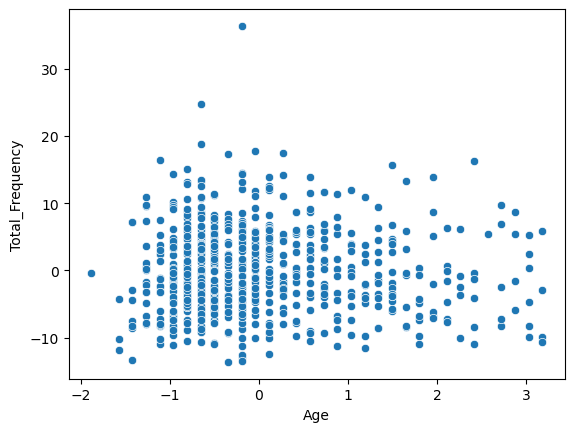

In [51]:
sns.scatterplot(x=data['Age'],y=data['Total_Frequency'])

In [55]:
from sklearn.decomposition import PCA
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Perform PCA 
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(scaled_data) 
# Create a DataFrame with the principal components 
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

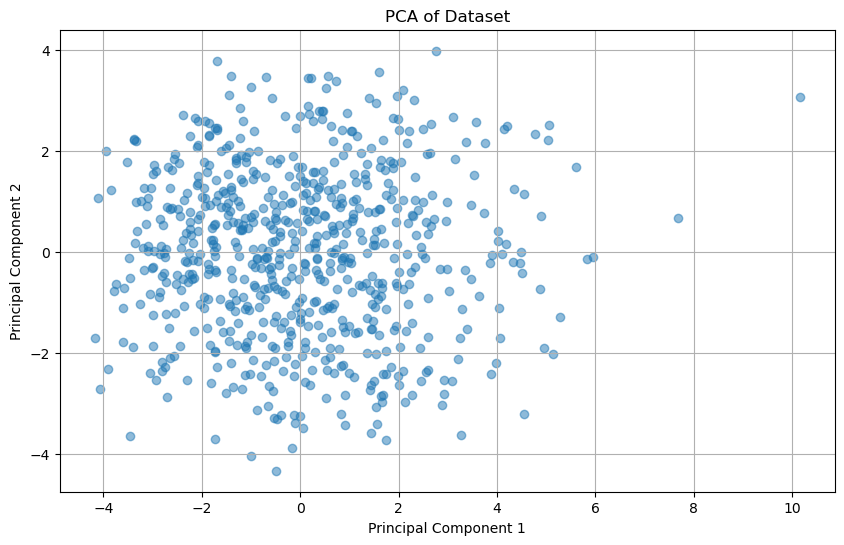

In [56]:
# Plot the principal components 
plt.figure(figsize=(10, 6)) 
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5) 
plt.title('PCA of Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.grid(True) 
plt.show()

In [59]:
import os
# Set environment variables 
os.environ['LOKY_MAX_CPU_COUNT'] = '4' 
# Adjust this number as needed 
os.environ['OMP_NUM_THREADS'] = '3' # Adjust this number as needed

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


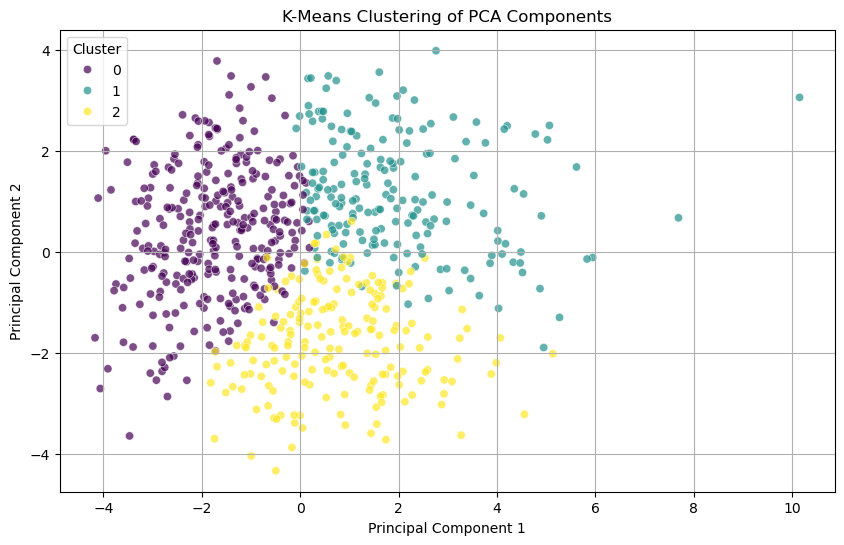

In [60]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


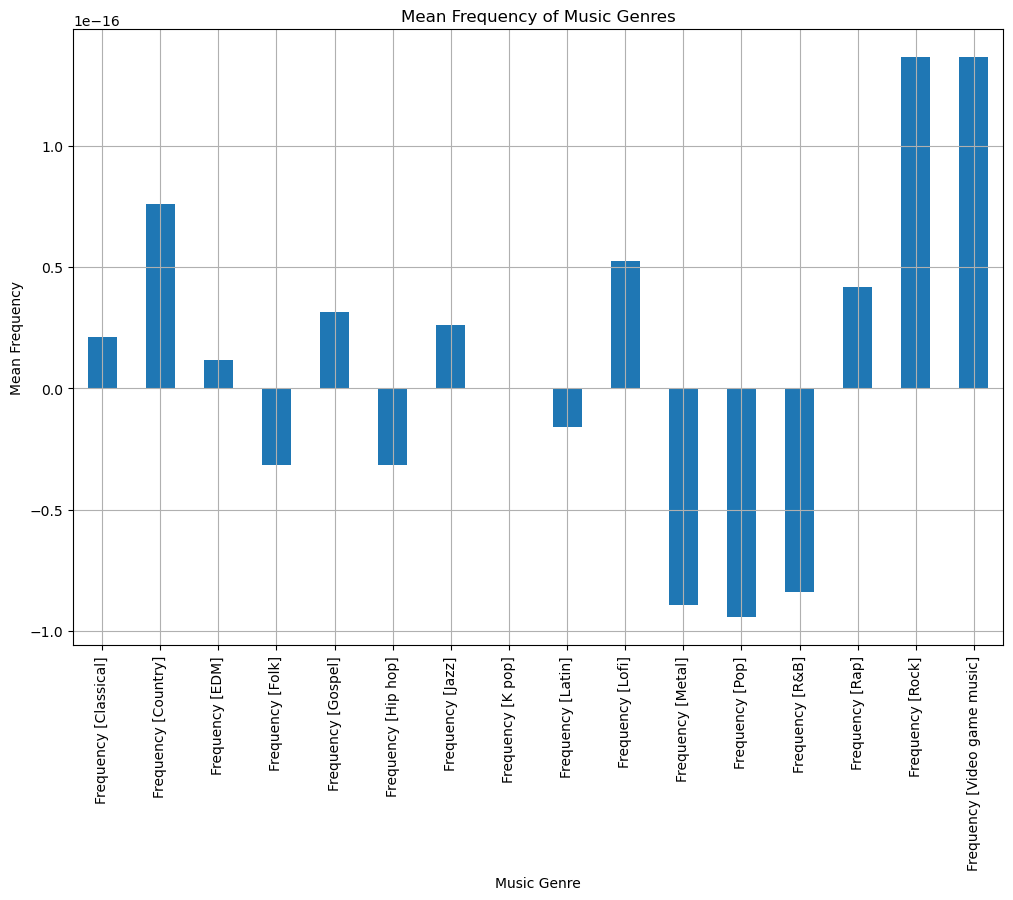

In [63]:
# frequency of certain music genres
mean_frequencies = data[frequency_cols].mean() 
# Create a bar plot 
plt.figure(figsize=(12, 8)) 
mean_frequencies.plot(kind='bar') 
plt.title('Mean Frequency of Music Genres') 
plt.xlabel('Music Genre') 
plt.ylabel('Mean Frequency') 
plt.grid(True) 
plt.show()

In [64]:
avg_listening_time = data['Hours per day'].mean() 
print(f"Average Listening Time: {avg_listening_time:.2f} hours per day")

Average Listening Time: -0.00 hours per day


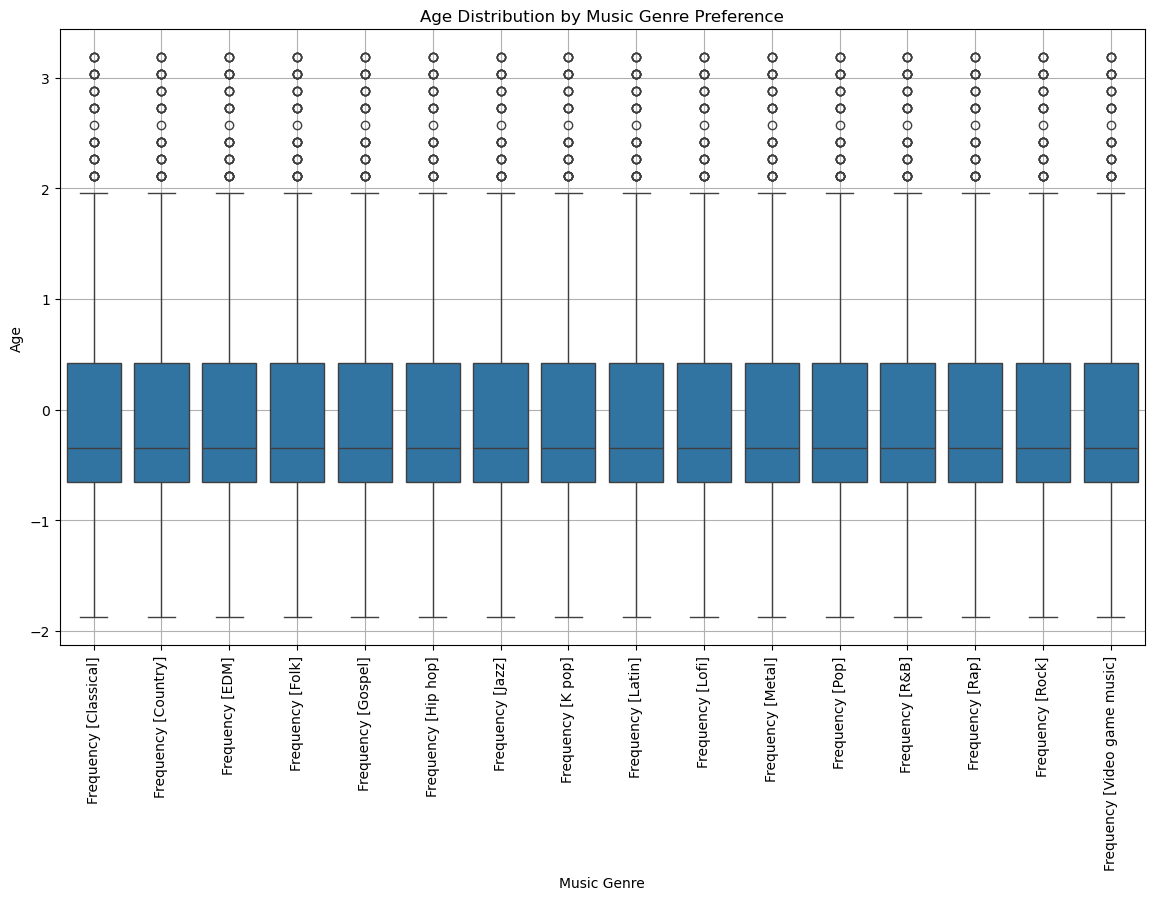

In [67]:
#relation b/w age & music preferences
# Melt the data for easier plotting m
melted_data = data.melt(id_vars=['Age'], value_vars=frequency_cols, var_name='Genre', value_name='Frequency') 
# Create box plots 
plt.figure(figsize=(14, 8)) 
sns.boxplot(x='Genre', y='Age', data=melted_data) 
plt.xticks(rotation=90) 
plt.title('Age Distribution by Music Genre Preference') 
plt.xlabel('Music Genre') 
plt.ylabel('Age') 
plt.grid(True) 
plt.show()

In [69]:
# Define target and features 
target = 'Total_Frequency' 
features = [col for col in data.columns if col != target]

In [71]:
data = data.dropna(subset=[target]) 
# Train-test split 
X = data[features]
y = data[target] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Clean feature names by replacing special characters
cleaned_feature_names = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X.columns]
X.columns = cleaned_feature_names


In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# ... (Data loading and preprocessing as before) ...

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}")

# Select the model with the best MSE for further analysis and tuning.

Linear Regression: MSE = 0.00
Ridge Regression: MSE = 0.00
Lasso Regression: MSE = 8.51
Decision Tree: MSE = 29.37
Random Forest: MSE = 9.57
Gradient Boosting: MSE = 2.58
